In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import rasterio
import os 
import glob
from tqdm import tqdm

In [2]:
list_path = [os.path.join('/mnt/storage/huyekgis/brios/RAW_TEST_Data/AnNinh_Ground_Truth', path) for path in os.listdir('/mnt/storage/huyekgis/brios/RAW_TEST_Data/AnNinh_Ground_Truth')]

In [3]:
from datetime import datetime

In [4]:
list_path = sorted(list_path, key=lambda x: datetime.strptime(x.split('_')[-1].split('.')[0], '%Y-%m-%d'))


In [5]:
def transform_tif_to_npy(list_path):
    GT_image = []
    for path in tqdm(list_path, desc="Transform tiff to npy: "):
        with rasterio.open(path) as src:
            data = src.read(1)
            GT_image.append(np.array(data))

    return GT_image

In [6]:
GT_image = transform_tif_to_npy(list_path)

Transform tiff to npy: 100%|██████████| 35/35 [00:00<00:00, 78.37it/s]


In [7]:
inference_path = [os.path.join('/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46', path) for path in os.listdir('/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46')]

In [8]:
inference_path

['/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2023-02-06.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-01.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-09.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-17.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-25.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-11-02.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-11-10.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-11-18.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_D

In [9]:
def extract_date(path):
    return path.split('/')[-1].split('_')[-1].split('.')[0]

In [10]:
list_days = [extract_date(path) for path in list_path] 

In [11]:
list_days

['2022-10-01',
 '2022-10-09',
 '2022-10-17',
 '2022-10-25',
 '2022-11-02',
 '2022-11-10',
 '2022-11-18',
 '2022-11-26',
 '2022-12-12',
 '2022-12-20',
 '2022-12-28',
 '2023-01-13',
 '2023-01-21',
 '2023-01-29',
 '2023-02-22',
 '2023-03-02',
 '2023-03-10',
 '2023-05-05',
 '2023-05-13',
 '2023-05-21',
 '2023-05-29',
 '2023-06-06',
 '2023-06-14',
 '2023-06-22',
 '2023-06-30',
 '2023-07-08',
 '2023-07-16',
 '2023-07-24',
 '2023-08-01',
 '2023-08-17',
 '2023-08-25',
 '2023-09-02',
 '2023-09-10',
 '2023-09-18',
 '2023-09-26']

In [12]:
from datetime import datetime
list_days = sorted(list_days, key=lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [13]:
inference_path_same = []
for date in list_days:
    path = f'/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_{date}.tif'
    inference_path_same.append(path)

In [14]:
inference_path_same

['/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-01.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-09.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-17.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-25.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-11-02.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-11-10.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-11-18.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-11-26.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_D

In [15]:
inference_image = transform_tif_to_npy(inference_path_same)

Transform tiff to npy: 100%|██████████| 35/35 [00:00<00:00, 623.33it/s]


In [16]:
inference_image[0]

array([[0.8632163 , 0.85988396, 0.6041237 , ..., 0.7857311 , 0.81868386,
        0.8230133 ],
       [0.78907   , 0.7817109 , 0.27256152, ..., 0.76405966, 0.7740169 ,
        0.8176871 ],
       [0.5979579 , 0.75306123, 0.33164984, ..., 0.75747687, 0.7403035 ,
        0.72842103],
       ...,
       [0.5581337 , 0.5587641 , 0.55441374, ..., 0.25304878, 0.31912225,
        0.3222286 ],
       [0.55055   , 0.53824306, 0.52762485, ..., 0.32406893, 0.32490975,
        0.32207084],
       [0.54584277, 0.5360658 , 0.52423227, ..., 0.33050397, 0.3431927 ,
        0.3597534 ]], dtype=float32)

In [17]:
GT_image[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [18]:
for i in range(len(inference_image)):
    print('inference ', inference_path_same[i])
    print('gt ', list_path[i])

inference  /mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-01.tif
gt  /mnt/storage/huyekgis/brios/RAW_TEST_Data/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-01.tif
inference  /mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-09.tif
gt  /mnt/storage/huyekgis/brios/RAW_TEST_Data/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-09.tif
inference  /mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-17.tif
gt  /mnt/storage/huyekgis/brios/RAW_TEST_Data/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-17.tif
inference  /mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/results_32_46/img_2022-10-25.tif
gt  /mnt/storage/huyekgis/brios/RAW_TEST_Data/AnNinh_Ground_Truth/anninh_ndvi8days__2022-10-25.tif
inference  /mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/re

In [19]:
import rasterio
from rasterio.enums import Resampling

In [20]:
def resample_raster(source_path, target_path, output_path):
    # Mở ảnh nguồn
    with rasterio.open(source_path) as src:
        # Mở ảnh mục tiêu để lấy thông tin kích thước
        with rasterio.open(target_path) as target:
            target_width = target.width
            target_height = target.height
            target_transform = target.transform
            target_crs = target.crs

        # Định nghĩa profile cho ảnh resample
        profile = src.profile
        profile.update({
            'width': target_width,
            'height': target_height,
            'transform': target_transform,
            'crs': target_crs
        })

        # Resample và lưu ảnh
        with rasterio.open(output_path, 'w', **profile) as dst:
            for i in range(1, src.count + 1):  # Duyệt qua từng band
                data = src.read(
                    i,
                    out_shape=(target_height, target_width),
                    resampling=Resampling.bilinear  # Nội suy bilinear
                )
                dst.write(data, i)

In [21]:
output_path = '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample'
for i in tqdm(range(len(list_path))):
    output_path_file = f'{output_path}/anninh_infer_{list_days[i]}.tif'
    resample_raster(inference_path_same[i], list_path[i], output_path_file)

100%|██████████| 35/35 [00:00<00:00, 36.41it/s]


In [22]:
def calculate_rmse(array1, array2):
    # Xác định mask của các vị trí không phải NaN trong cả hai mảng
    valid_mask = ~np.isnan(array1) & ~np.isnan(array2)
    
    # Lọc giá trị từ cả hai mảng theo mask
    valid_array1 = array1[valid_mask]
    valid_array2 = array2[valid_mask]
    
    # Tính RMSE
    rmse = np.sqrt(np.mean((valid_array1 - valid_array2) ** 2))
    return rmse

In [23]:
f = '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-10-01.tif'
with rasterio.open(f) as src:
    d = src.read(1)
    a = src.meta
d.shape

(466, 398)

In [24]:
a

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 398,
 'height': 466,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 106.39152151705346,
        0.0, -8.983152841195215e-05, 20.683889079908806)}

In [25]:
list_img_resample_infer = [f'{output_path}/anninh_infer_{day}.tif' for day in list_days]

In [26]:
list_img_resample_infer

['/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-10-01.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-10-09.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-10-17.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-10-25.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-11-02.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-11-10.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/result_resample/anninh_infer_2022-11-18.tif',
 '/mnt/storage/huyekgis/brios/RAW_TEST_Data/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBin

In [27]:
inference_image = transform_tif_to_npy(list_img_resample_infer)

Transform tiff to npy: 100%|██████████| 35/35 [00:00<00:00, 566.05it/s]


In [28]:
inference_image_1 = np.load('/mnt/storage/huyekgis/brios/BRIOS/results/anninh/test_anninh_32_46.npy')

In [29]:
inference_image.shape

AttributeError: 'list' object has no attribute 'shape'

In [30]:
inference_image_1.shape

(464, 396, 46)

In [31]:
for i in range(len(GT_image)):
    print(f'size at {i} GT: {GT_image[i].shape}')
    print(f'size at {i} infer: {inference_image[i].shape}')

size at 0 GT: (466, 398)
size at 0 infer: (466, 398)
size at 1 GT: (466, 398)
size at 1 infer: (466, 398)
size at 2 GT: (466, 398)
size at 2 infer: (466, 398)
size at 3 GT: (466, 398)
size at 3 infer: (466, 398)
size at 4 GT: (466, 398)
size at 4 infer: (466, 398)
size at 5 GT: (466, 398)
size at 5 infer: (466, 398)
size at 6 GT: (466, 398)
size at 6 infer: (466, 398)
size at 7 GT: (466, 398)
size at 7 infer: (466, 398)
size at 8 GT: (466, 398)
size at 8 infer: (466, 398)
size at 9 GT: (466, 398)
size at 9 infer: (466, 398)
size at 10 GT: (466, 398)
size at 10 infer: (466, 398)
size at 11 GT: (466, 398)
size at 11 infer: (466, 398)
size at 12 GT: (466, 398)
size at 12 infer: (466, 398)
size at 13 GT: (466, 398)
size at 13 infer: (466, 398)
size at 14 GT: (466, 398)
size at 14 infer: (466, 398)
size at 15 GT: (466, 398)
size at 15 infer: (466, 398)
size at 16 GT: (466, 398)
size at 16 infer: (466, 398)
size at 17 GT: (466, 398)
size at 17 infer: (466, 398)
size at 18 GT: (466, 398)
size

In [32]:
rmse_final = []
for i in range(len(GT_image)):
    rmse_final.append(calculate_rmse(GT_image[i], inference_image[i]))

In [33]:
def calculate_mse(array1, array2):
    # Tạo mask cho các vị trí không phải NaN trong cả hai mảng
    valid_mask = ~np.isnan(array1) & ~np.isnan(array2)
    
    # Lọc các giá trị hợp lệ từ cả hai mảng
    valid_array1 = array1[valid_mask]
    valid_array2 = array2[valid_mask]
    
    # Tính MSE
    mse = np.mean((valid_array1 - valid_array2) ** 2)
    return mse

In [34]:
def calculate_std_difference(array1, array2):
    # Tạo mask cho các vị trí không phải NaN trong cả hai mảng
    valid_mask = ~np.isnan(array1) & ~np.isnan(array2)
    
    # Lọc các giá trị hợp lệ từ cả hai mảng
    valid_array1 = array1[valid_mask]
    valid_array2 = array2[valid_mask]
    
    # Tính sự khác biệt giữa hai mảng
    difference = valid_array1 - valid_array2
    
    # Tính độ lệch chuẩn của sự khác biệt
    std_difference = np.std(difference)
    return std_difference

In [35]:
mse_final = []
for i in range(len(GT_image)):
    mse_final.append(calculate_mse(GT_image[i], inference_image[i]))

In [36]:
std_final = []
for i in range(len(GT_image)):
    std_final.append(calculate_std_difference(GT_image[i], inference_image[i]))

In [37]:
std_final

[np.float32(0.14902322),
 np.float32(0.14292501),
 np.float32(0.15401231),
 np.float32(0.10828854),
 np.float32(0.08377819),
 np.float32(0.07715146),
 np.float32(0.09730419),
 np.float32(0.092839606),
 np.float32(0.11332431),
 np.float32(0.10007536),
 np.float32(0.11745057),
 np.float32(0.086939536),
 np.float32(0.11135642),
 np.float32(0.11769476),
 np.float32(0.11001503),
 np.float32(0.098480776),
 np.float32(0.116575405),
 np.float32(0.10626732),
 np.float32(0.13798097),
 np.float32(0.12671384),
 np.float32(0.110136345),
 np.float32(0.15250719),
 np.float32(0.08754723),
 np.float32(0.13593586),
 np.float32(0.13946407),
 np.float32(0.12715378),
 np.float32(0.15477799),
 np.float32(0.12147691),
 np.float32(0.12695232),
 np.float32(0.1554282),
 np.float32(0.120729975),
 np.float32(0.094382614),
 np.float32(0.08986702),
 np.float32(0.11042067),
 np.float32(0.14970545)]

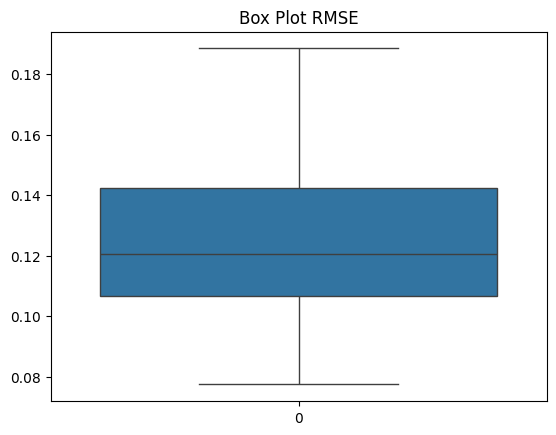

In [92]:
import seaborn as sns
import pandas as pd 

df = pd.DataFrame(rmse_final)

sns.boxplot(data=df)
plt.title("Box Plot RMSE")
plt.show()

In [38]:
np.median(rmse_final)

np.float32(0.12053992)

In [43]:
import pandas as pd
import seaborn as sns

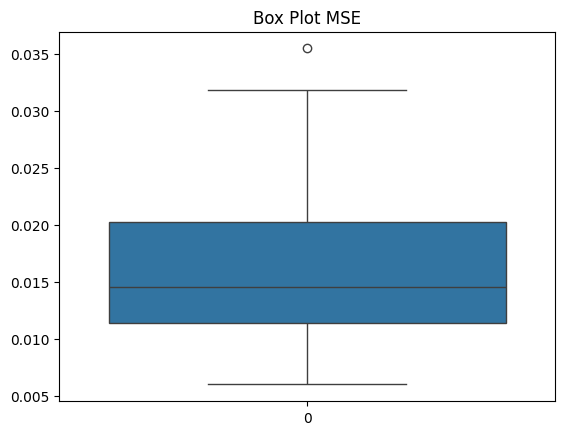

In [44]:
df = pd.DataFrame(mse_final)

sns.boxplot(data=df)
plt.title("Box Plot MSE")
plt.show()

In [45]:
np.mean(mse_final)

np.float32(0.01654362)

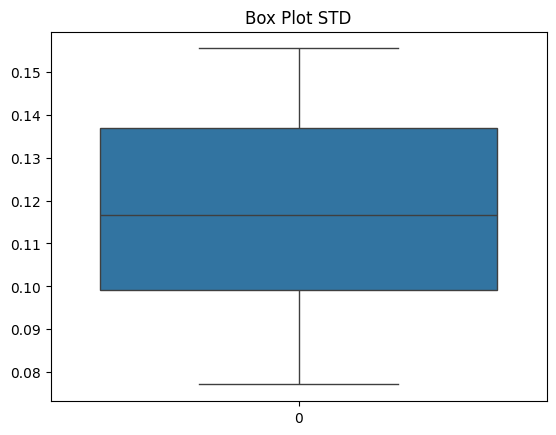

In [46]:
df = pd.DataFrame(std_final)

sns.boxplot(data=df)
plt.title("Box Plot STD")
plt.show()

In [47]:
np.median(std_final)

np.float32(0.116575405)

In [48]:
GT_image = np.array(GT_image)
inference_image = np.array(inference_image)

In [49]:
GT_image[:, 1,1]

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.69208425,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan],
      dtype=float32)

In [50]:
inference_image[:,200,200]

array([0.617176  , 0.8197253 , 0.85038877, 0.79754514, 0.6611373 ,
       0.6982696 , 0.7171049 , 0.60502315, 0.73771095, 0.69773   ,
       0.66885537, 0.7298138 , 0.66818   , 0.5869793 , 0.7355236 ,
       0.69195354, 0.64658433, 0.6929155 , 0.7496289 , 0.7262736 ,
       0.7629321 , 0.65926814, 0.5499061 , 0.7651921 , 0.7794868 ,
       0.8210872 , 0.83571804, 0.78818035, 0.78549767, 0.8196911 ,
       0.7763434 , 0.75773185, 0.7326174 , 0.74707294, 0.5955654 ],
      dtype=float32)

In [51]:
array1 = GT_image[:,200,200]
array2 = inference_image[:,200,200]

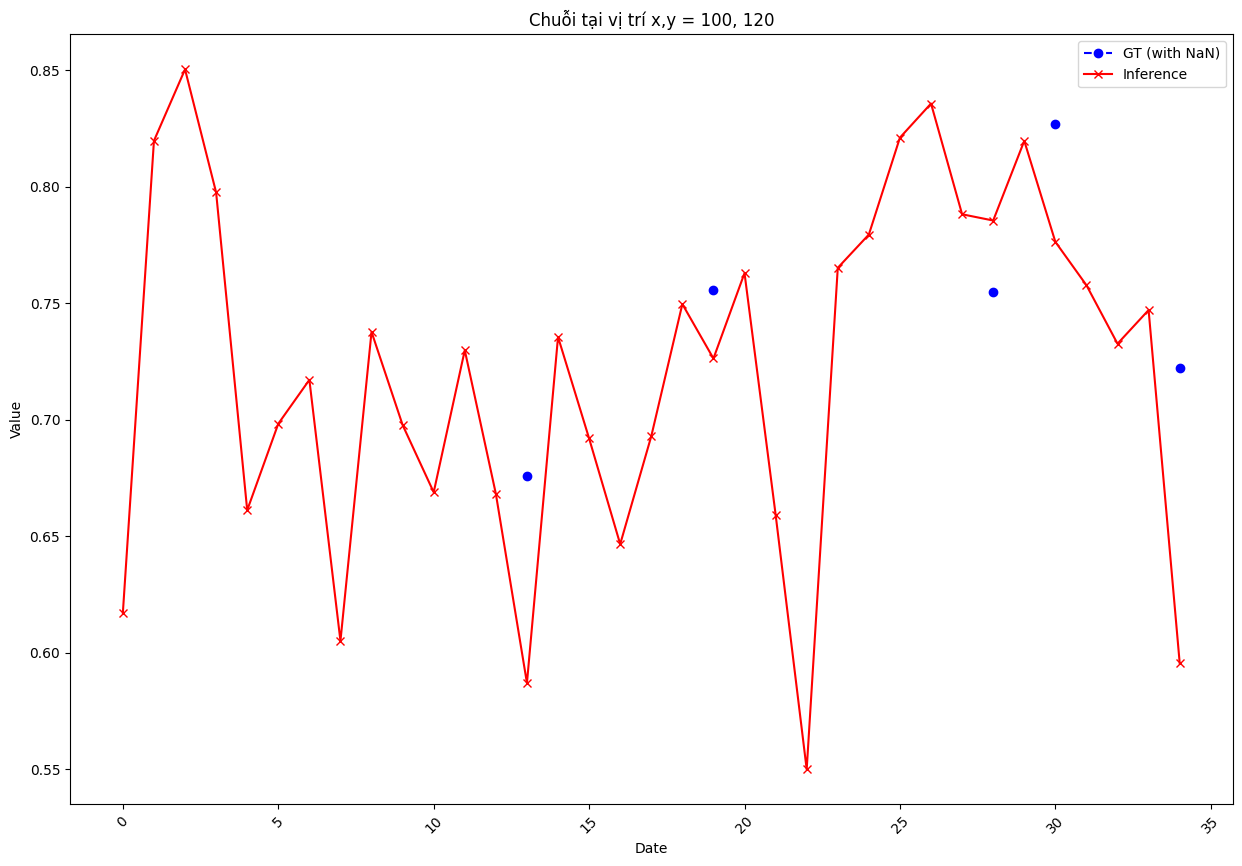

In [52]:
# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
# Plot chuỗi đầu tiên (array1)
plt.plot(array1, label='GT (with NaN)', marker='o', color='blue', linestyle='--')

# Plot chuỗi thứ hai (array2)
plt.plot(array2, label='Inference', marker='x', color='red')

# Thêm thông tin vào biểu đồ
plt.title('Chuỗi tại vị trí x,y = 100, 120')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn ngày tháng cho dễ đọc
plt.show()

Create difference image

In [102]:
def make_diff_img(img1, img2):
    difference = np.where(
        np.isnan(img1) | np.isnan(img2),  # Điều kiện: Nếu phần tử nào là NaN
        np.nan,                              # Gán NaN vào ma trận kết quả
        (img2-img1) ** 2                # Nếu không, thực hiện phép trừ
    )
    return difference

In [103]:
def make_diff_img1(img1, img2):
    # Kiểm tra điều kiện NaN trên cả hai ảnh
    valid_mask = ~np.isnan(img1) & ~np.isnan(img2)
    
    # Gán NaN vào những phần tử mà có NaN trong cả hai ảnh, còn lại lấy giá trị từ img2
    difference = np.where(valid_mask, img2, np.nan)
    
    return difference

In [104]:
list_diff_image = []
for i in range(len(GT_image)):
    list_diff_image.append(make_diff_img(GT_image[i], inference_image[i]))

In [105]:
list_diff_image[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [106]:
mean_std = []
for i in range(len(list_diff_image)):
    mean_std.append(np.nanmean(list_diff_image[i]))
    

In [107]:
np.min(mean_std)

np.float32(0.006005758)

In [108]:
np.max(mean_std)

np.float32(0.035494044)

In [109]:
for i in range(len(mean_std)):
    print(f'stt {i+1}: {mean_std[i]}')

stt 1: 0.028569307178258896
stt 2: 0.020659061148762703
stt 3: 0.023826489225029945
stt 4: 0.0117614371702075
stt 5: 0.008815589360892773
stt 6: 0.006005757953971624
stt 7: 0.009747087955474854
stt 8: 0.008908834308385849
stt 9: 0.013437301851809025
stt 10: 0.0100147919729352
stt 11: 0.015051380731165409
stt 12: 0.0318579338490963
stt 13: 0.01350208930671215
stt 14: 0.013945568352937698
stt 15: 0.014023520983755589
stt 16: 0.01060452964156866
stt 17: 0.01453898474574089
stt 18: 0.013020467013120651
stt 19: 0.019628774374723434
stt 20: 0.019155289977788925
stt 21: 0.01237892173230648
stt 22: 0.03549404442310333
stt 23: 0.011008254252374172
stt 24: 0.018485987558960915
stt 25: 0.01983766071498394
stt 26: 0.016510004177689552
stt 27: 0.025088230147957802
stt 28: 0.01475816871970892
stt 29: 0.023501740768551826
stt 30: 0.024592339992523193
stt 31: 0.014674928970634937
stt 32: 0.009282711893320084
stt 33: 0.00816847663372755
stt 34: 0.013081973418593407
stt 35: 0.025261912494897842


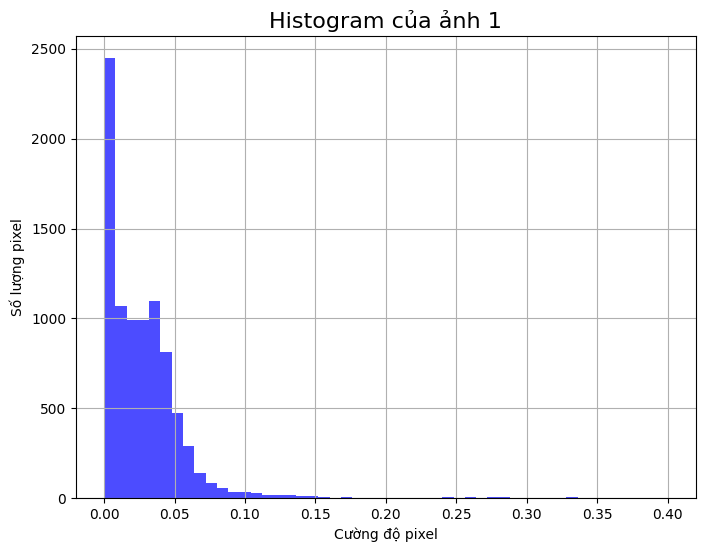

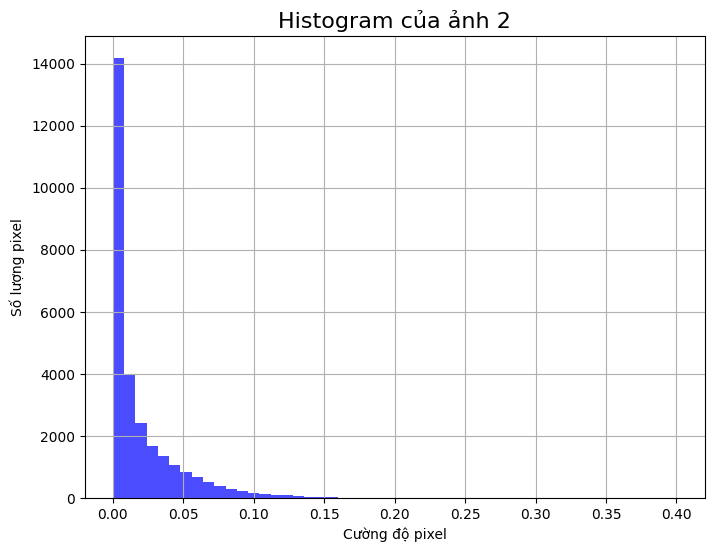

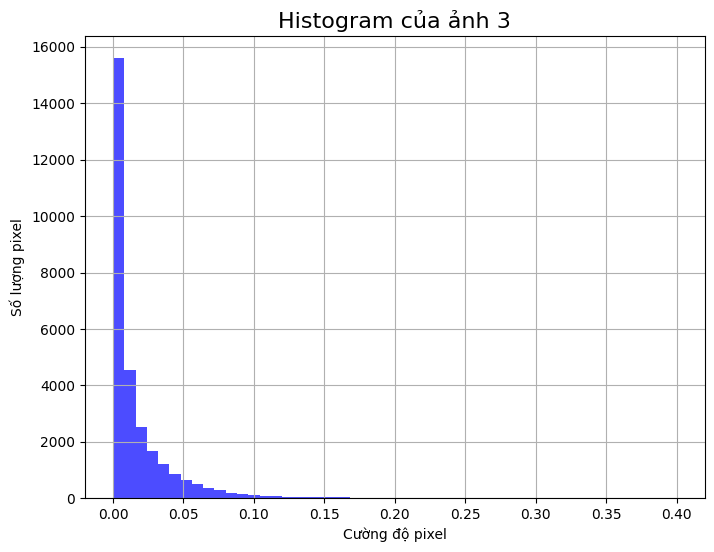

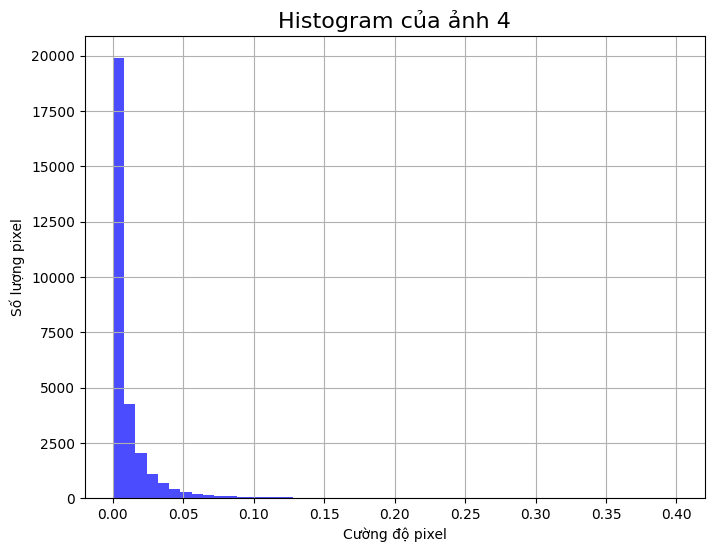

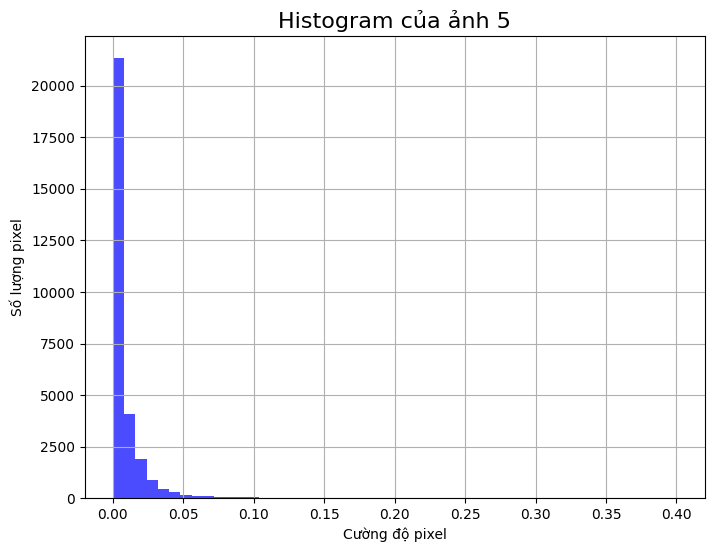

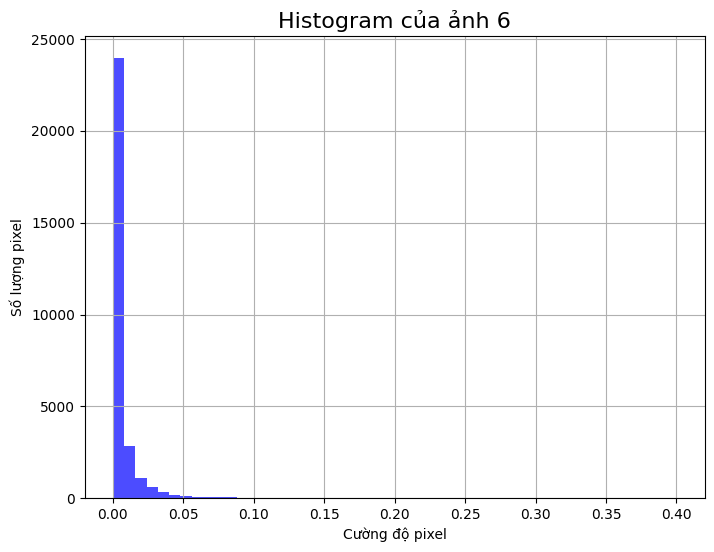

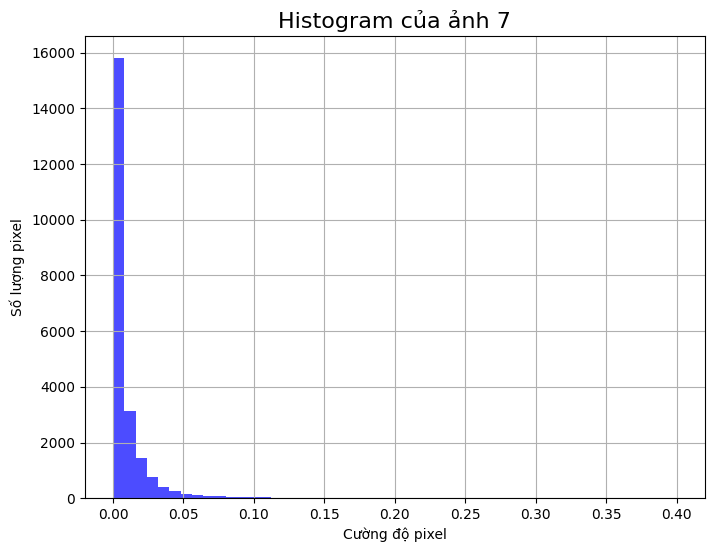

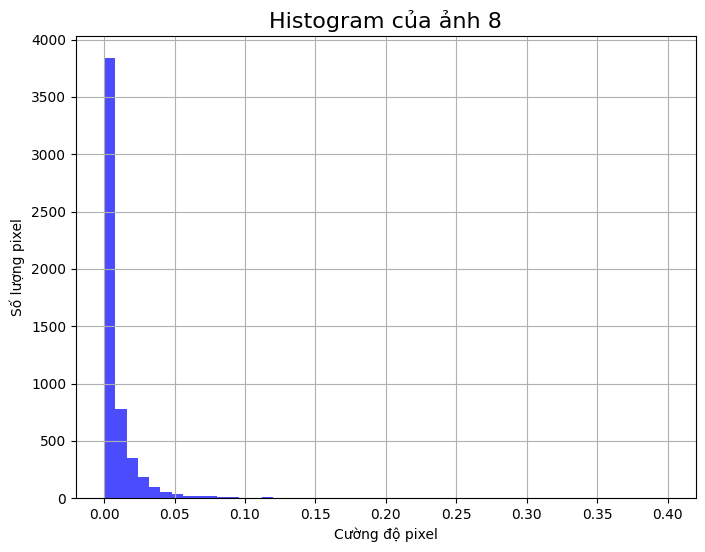

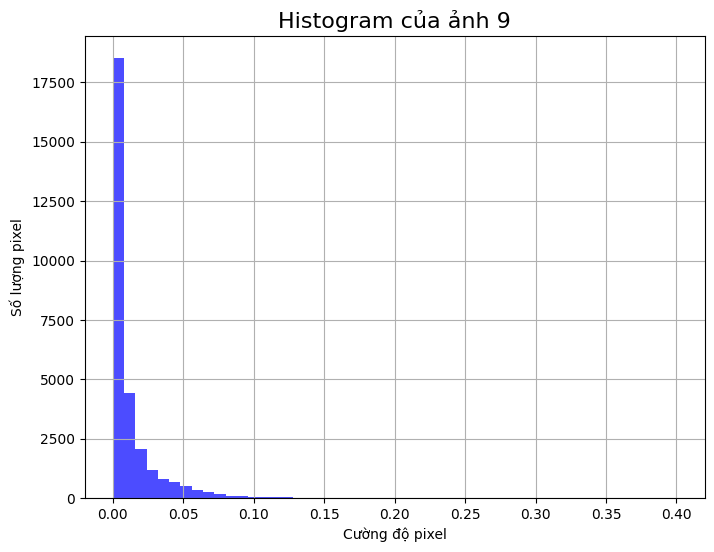

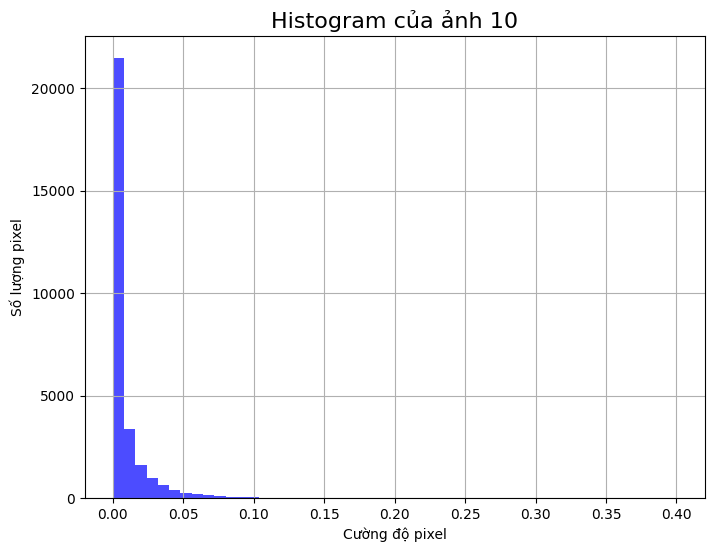

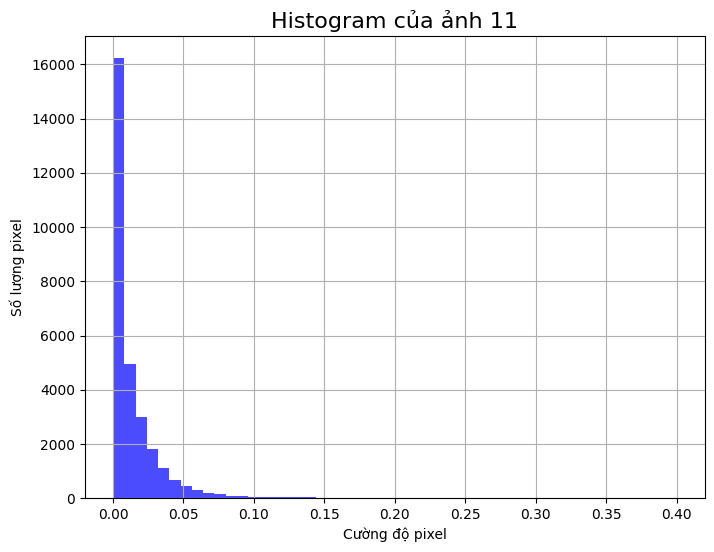

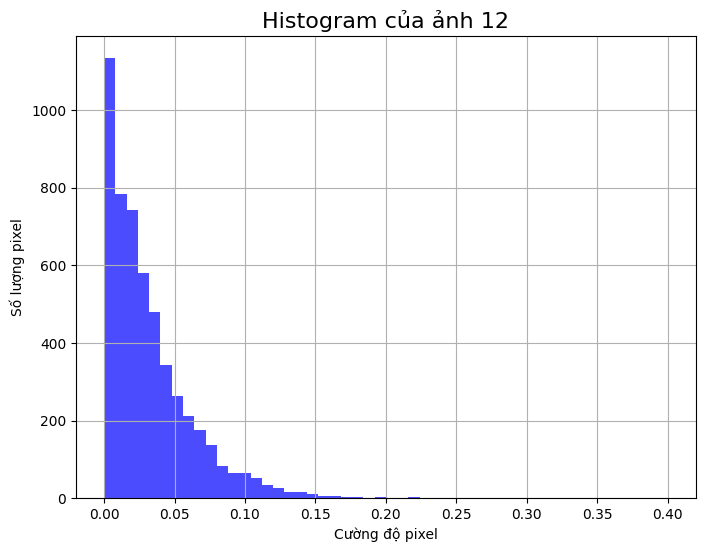

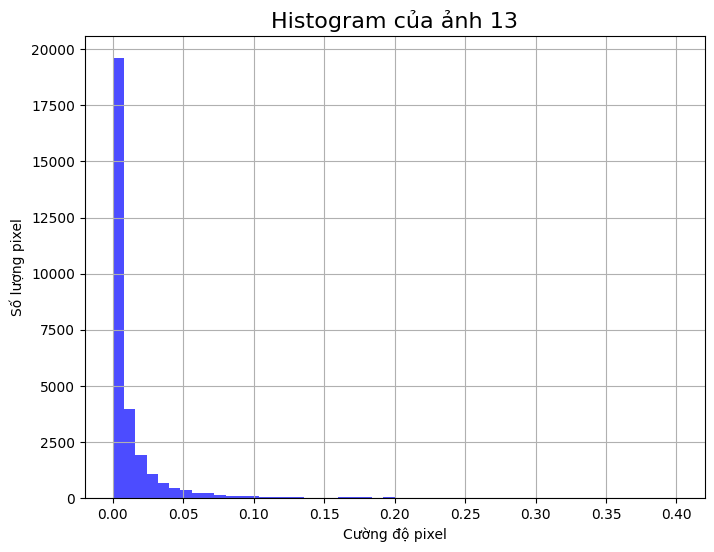

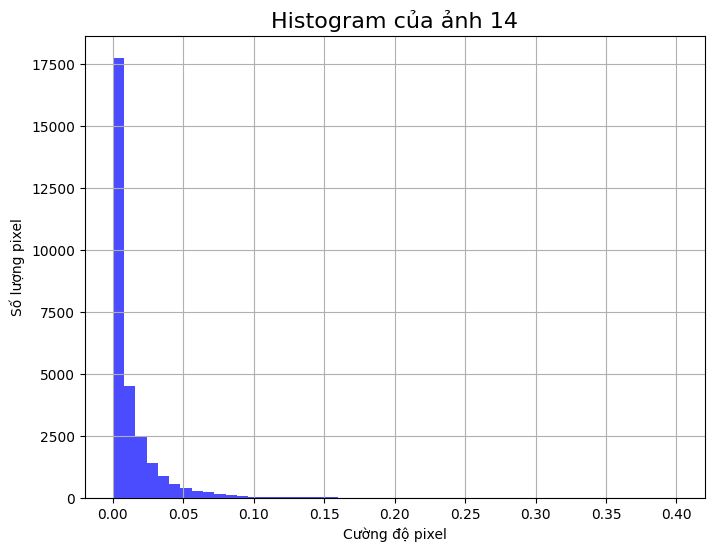

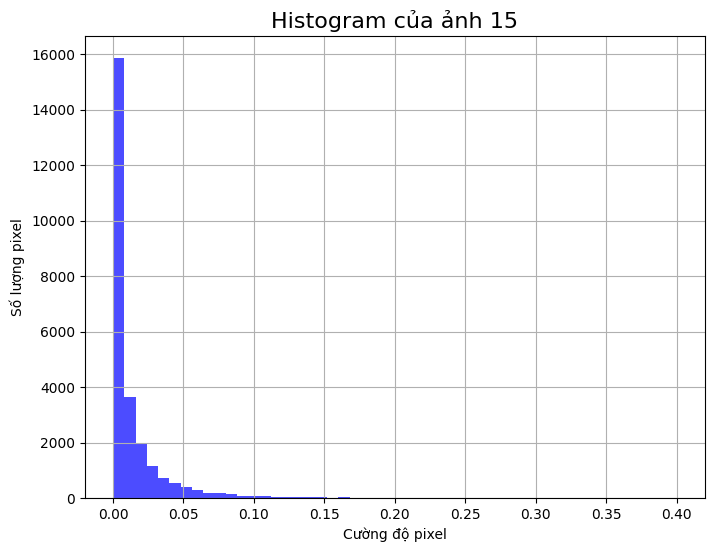

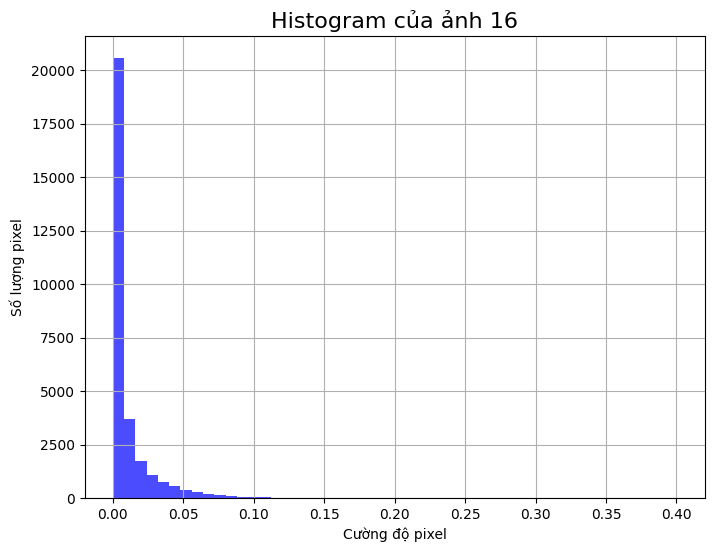

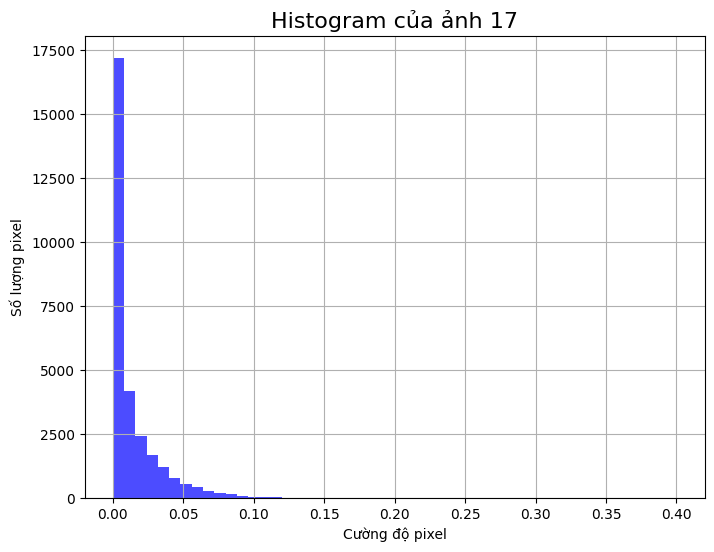

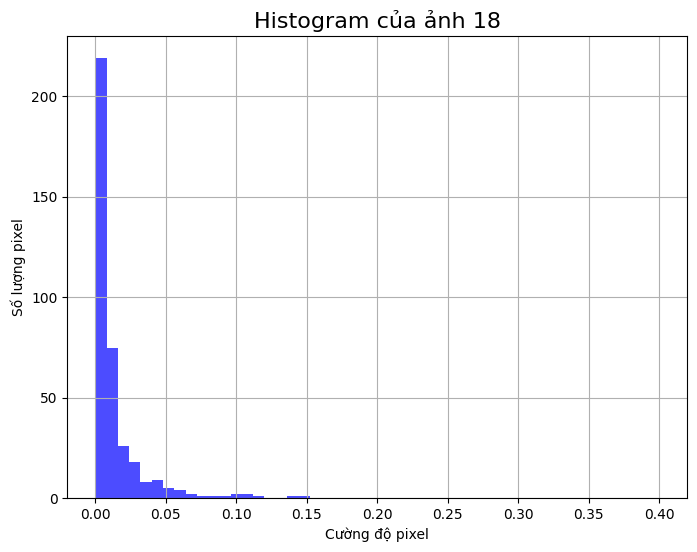

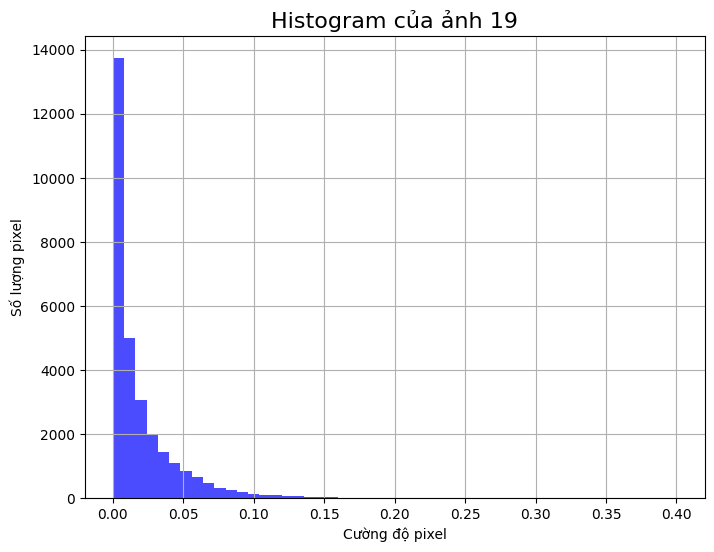

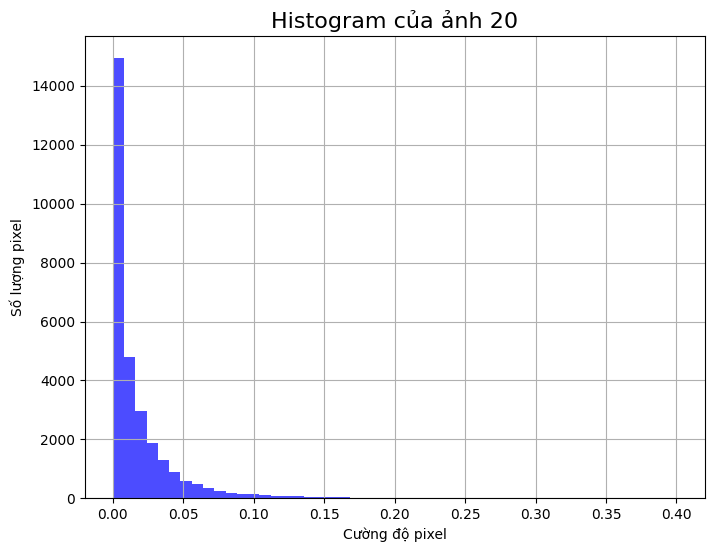

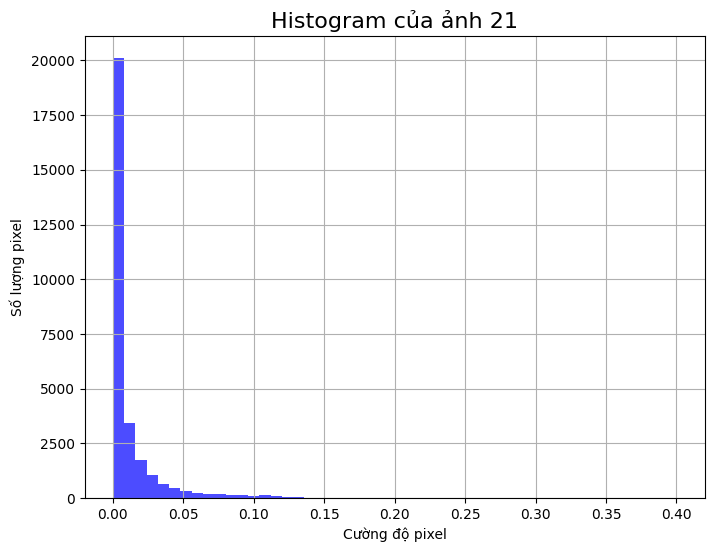

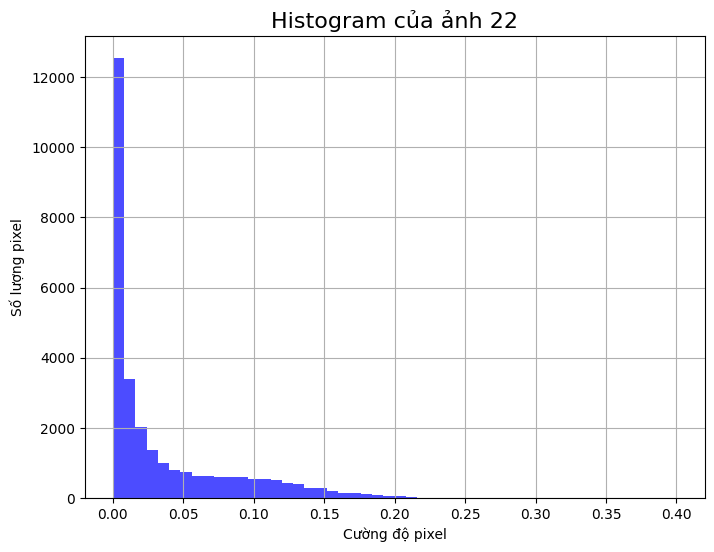

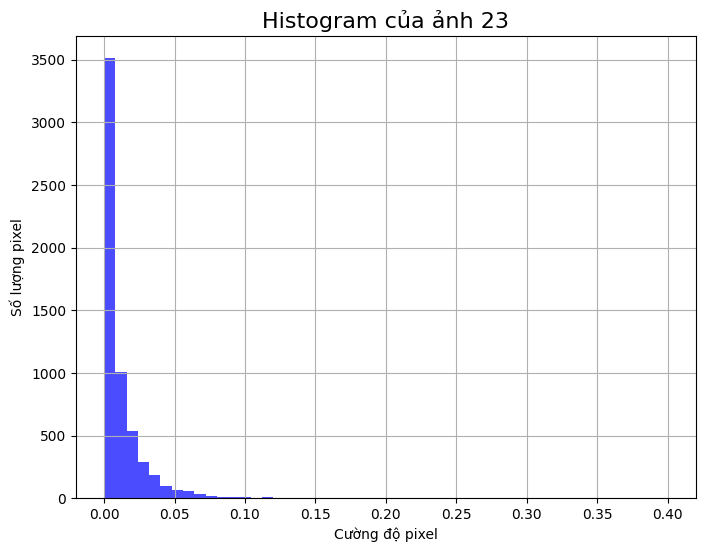

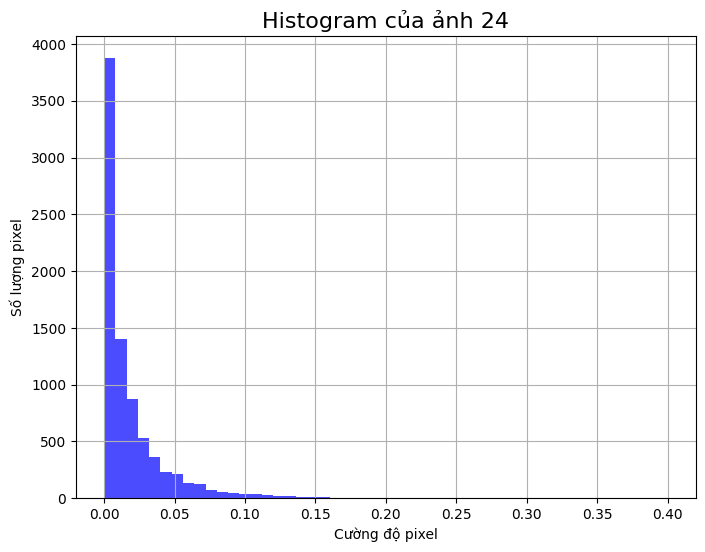

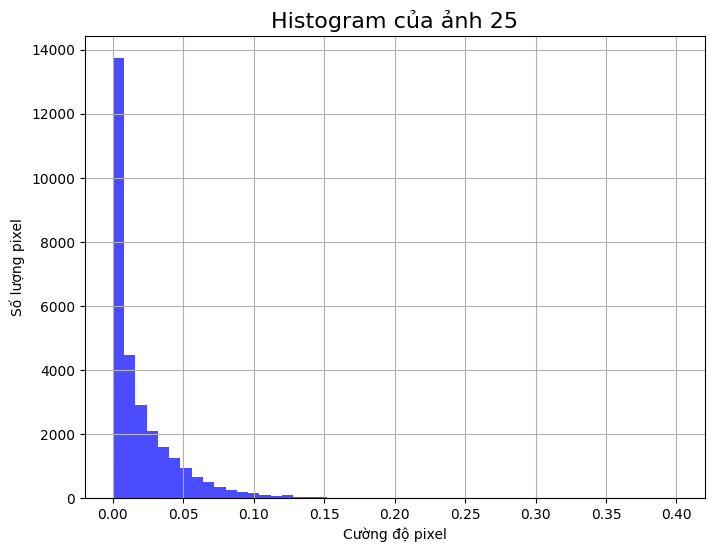

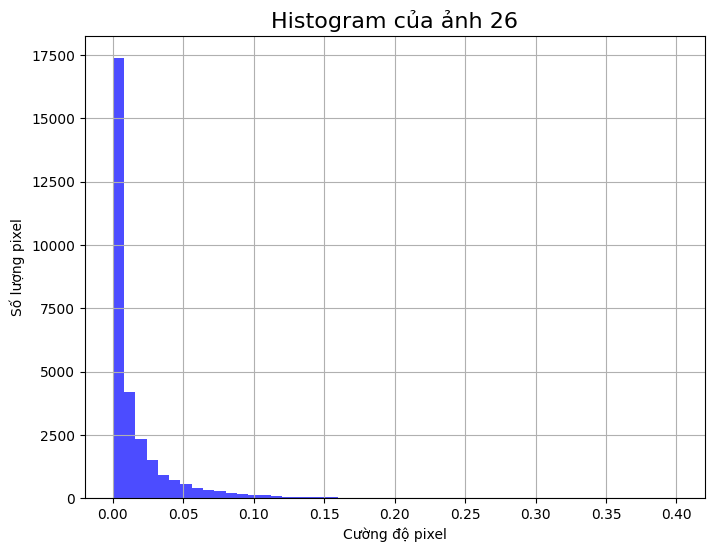

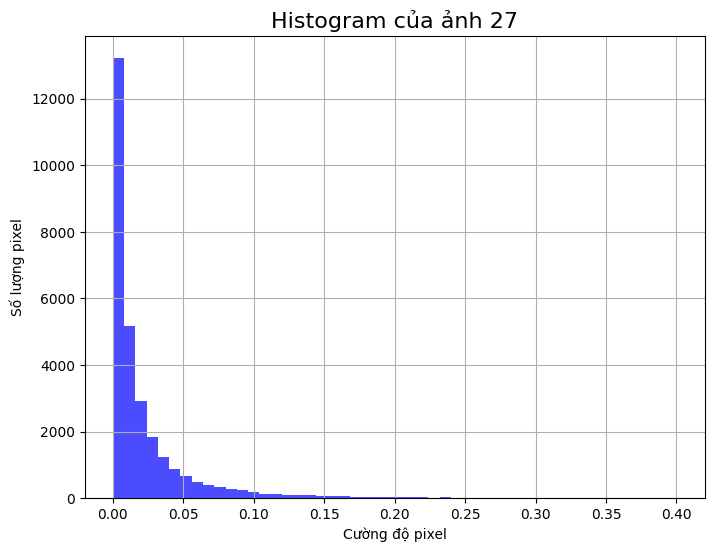

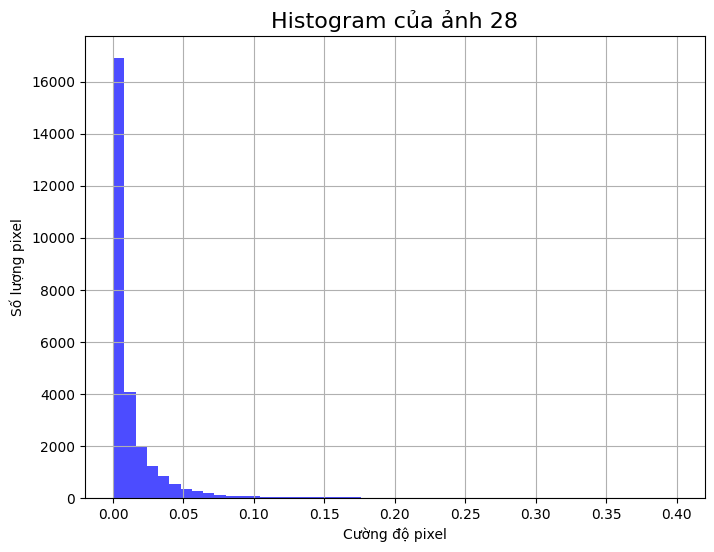

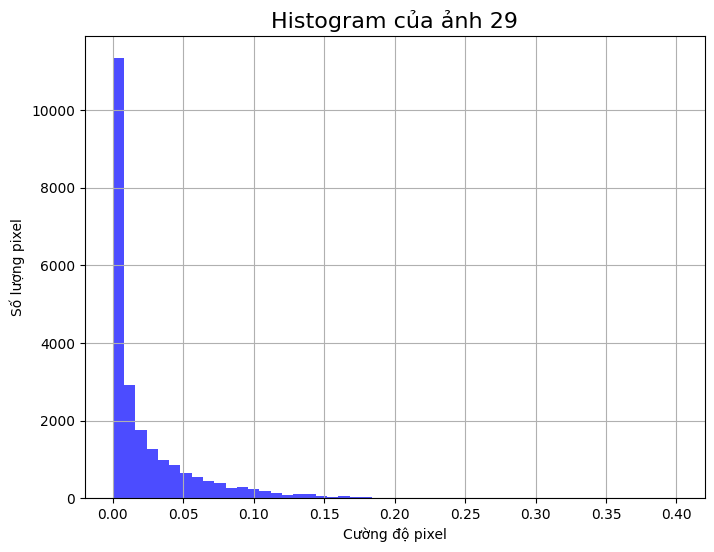

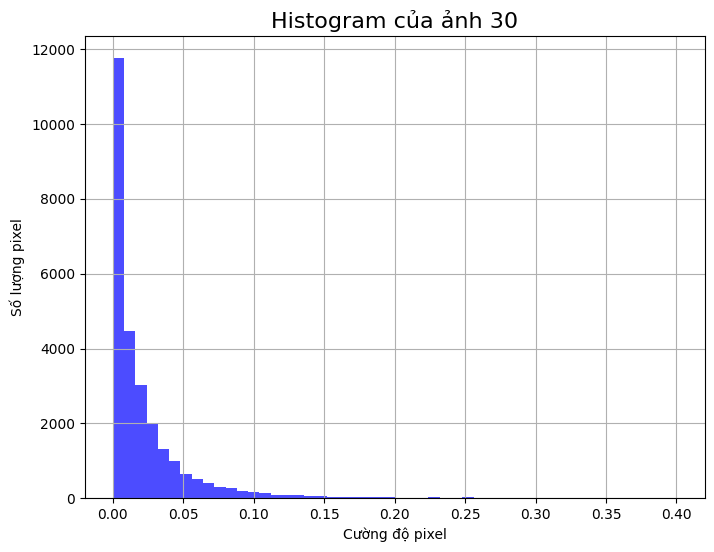

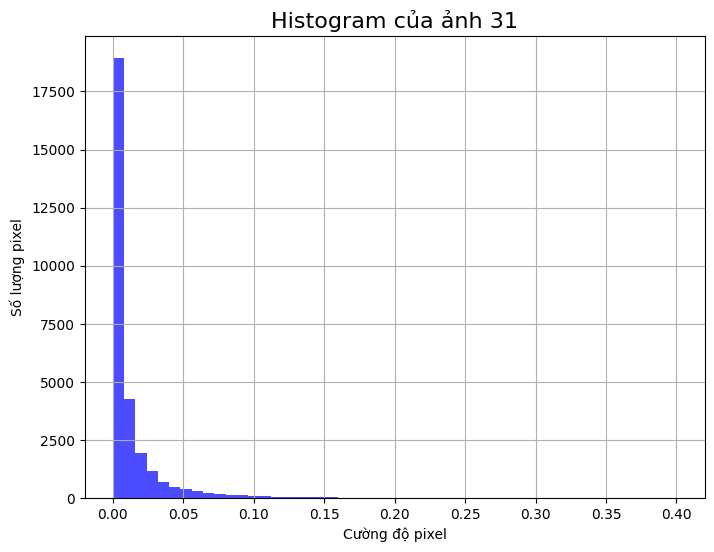

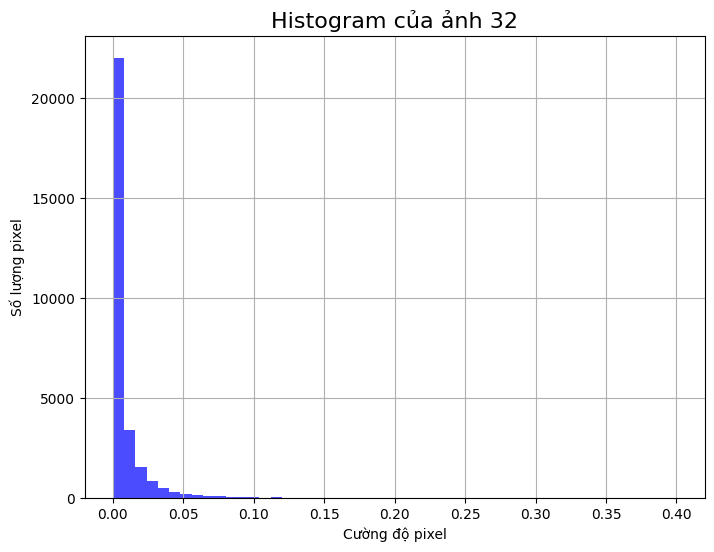

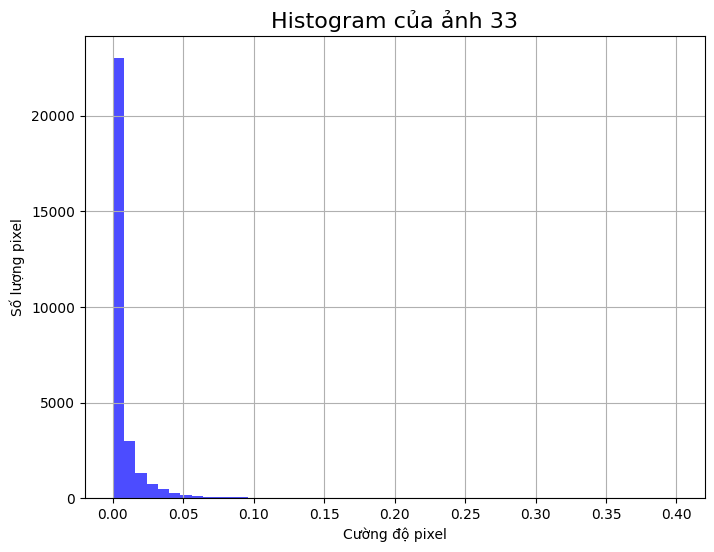

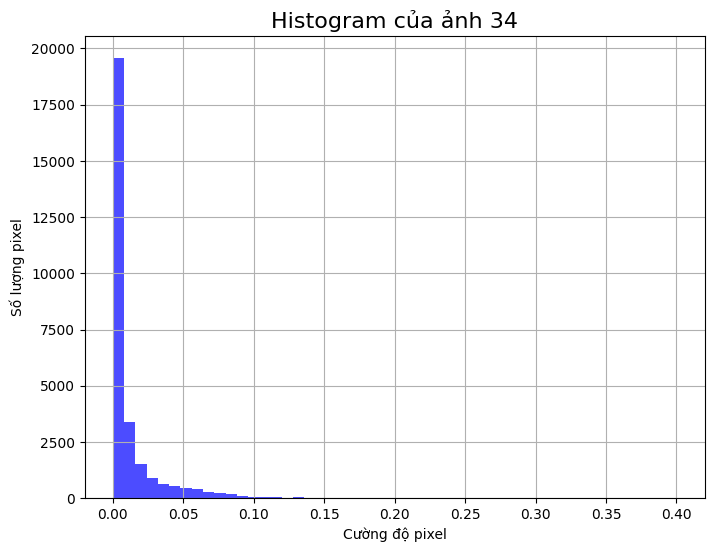

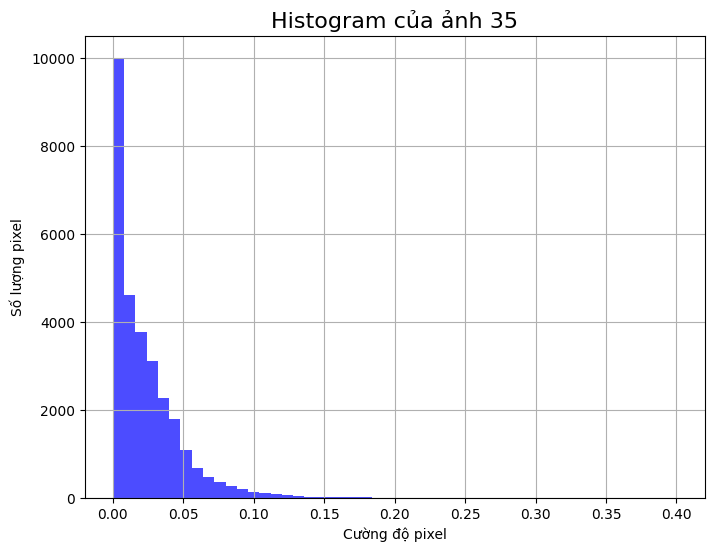

In [110]:
num_images = len(list_diff_image)

# Hiển thị từng ảnh một
for idx, img in enumerate(list_diff_image):
    plt.figure(figsize=(8, 6))
    plt.hist(img.ravel(), bins=50, range=(0, 0.4), color='blue', alpha=0.7)
    plt.title(f'Histogram của ảnh {idx + 1}', fontsize=16)
    plt.xlabel("Cường độ pixel")
    plt.ylabel("Số lượng pixel")
    plt.grid(True)
    plt.show()

In [118]:
def show_boxplot_for_image(image):
    """
    Hiển thị boxplot cho toàn bộ pixel của một ảnh, bỏ qua giá trị NaN.

    Parameters:
    - image: Mảng 2D đại diện cho ảnh.
    """
    # Loại bỏ NaN
    valid_pixels = image[~np.isnan(image)]

    # Kiểm tra nếu không còn giá trị hợp lệ
    if valid_pixels.size == 0:
        print("Ảnh không còn giá trị hợp lệ sau khi loại bỏ NaN!")
        return

    # Vẽ boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(valid_pixels.ravel(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'),
                medianprops=dict(color='red'))
    plt.title("Boxplot cho toàn bộ pixel của ảnh (không tính NaN)", fontsize=16)
    plt.xlabel("Cường độ pixel")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# visual

/mnt/storage/huyekgis/brios/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


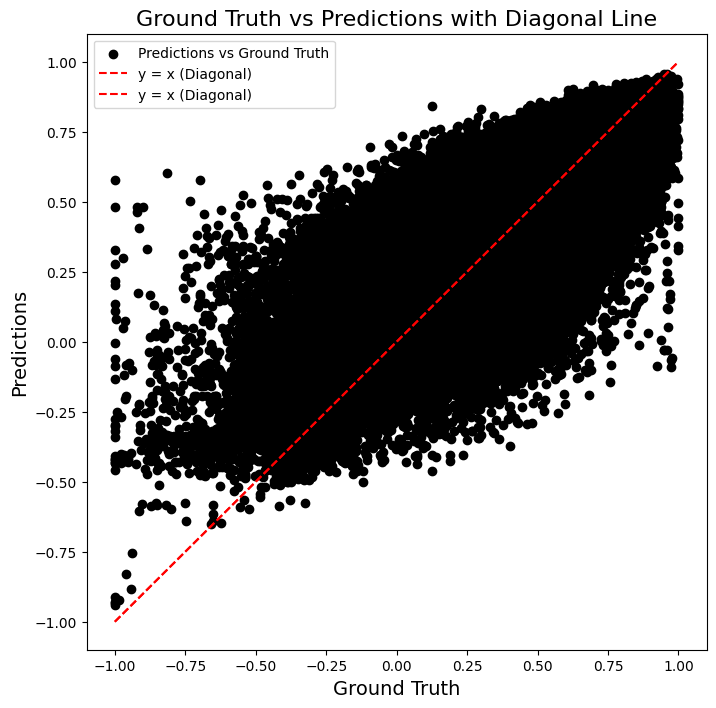

In [53]:
GT_flat = np.array(GT_image).flatten()
inference_flat = np.array(inference_image).flatten()



# Vẽ scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x = GT_flat,y = inference_flat, color='black', label='Predictions vs Ground Truth')

# Vẽ đường chéo y = x
min_value = (-1,-1)
max_value = (1,1)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='y = x (Diagonal)')

# Thêm tiêu đề và nhãn
plt.title('Ground Truth vs Predictions with Diagonal Line', fontsize=16)
plt.xlabel('Ground Truth', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.legend()

# Hiển thị biểu đồ
plt.show()